---
# Exercício Breast Cancer - árvore de decisão
---
**Machine Learning em Projetos (Erick Muzart e Fernando melo)**

Usando dados do Breast Cancer, descritos no site do Sklearn Datasets

## Análise exploratória dos dados

In [7]:
# Importar bibliotecas pandas, plot_confusion_matrix, train_test_split, matplotlib, RandomForestClassifier, numpy 
#import pandas as pd
import modin.pandas as pd #https://modin.readthedocs.io/
import ray
ray.init(ignore_reinit_error=True)


2021-11-30 15:12:57,863	INFO worker.py:832 -- Calling ray.init() again after it has already been called.


In [8]:
# Carregar e instanciar biblioteca de dados (load_breast_cancer)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [30]:
# Criar dataframe a partir dos dados importados
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['y'] = cancer.target
# Mostrar as dimensões e as primeiras linhas do dataframe
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [33]:
# Mostra número de valores nulos no dataset
nan_series = df.isna().sum()/len(df)
nan_series[nan_series > 0]

Series([], dtype: nan)

In [34]:
# Mostrar novas dimensões do dataset
df.shape

(569, 31)

In [35]:
# Verifica balanceamento das classses (value_counts())
classes = df.y.value_counts()/len(df)
classes

1    0.627417
0    0.372583
Name: y, dtype: float64

In [37]:
# Dividir dados em treino e teste
from sklearn.model_selection import train_test_split
df = df.sample(frac=1) #suffling the dataset
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
542,14.74,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.03027,0.1840,0.05680,...,32.29,107.40,826.4,0.1060,0.1376,0.1611,0.10950,0.2722,0.06956,1
15,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,...,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.17120,0.4218,0.13410,0
211,11.84,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.01393,0.1533,0.06057,...,24.99,85.22,546.3,0.1280,0.1880,0.1471,0.06913,0.2535,0.07993,1
62,14.25,22.15,96.42,645.7,0.10490,0.20080,0.21350,0.08653,0.1949,0.07292,...,29.51,119.10,959.5,0.1640,0.6247,0.6922,0.17850,0.2844,0.11320,0
54,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,...,31.69,117.70,1030.0,0.1389,0.2057,0.2712,0.15300,0.2675,0.07873,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df.y, test_size=0.15, random_state=42,stratify=y)
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
28,15.30,25.27,102.40,732.4,0.10820,0.16970,0.168300,0.08751,0.1926,0.06540,...,20.27,36.71,149.30,1269.0,0.16410,0.61100,0.63350,0.20240,0.4027,0.09876
354,11.14,14.07,71.24,384.6,0.07274,0.06064,0.045050,0.01471,0.1690,0.06083,...,12.12,15.82,79.62,453.5,0.08864,0.12560,0.12010,0.03922,0.2576,0.07018
502,12.54,16.32,81.25,476.3,0.11580,0.10850,0.059280,0.03279,0.1943,0.06612,...,13.57,21.40,86.67,552.0,0.15800,0.17510,0.18890,0.08411,0.3155,0.07538
493,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
165,14.97,19.76,95.50,690.2,0.08421,0.05352,0.019470,0.01939,0.1515,0.05266,...,15.98,25.82,102.30,782.1,0.10450,0.09995,0.07750,0.05754,0.2646,0.06085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,19.27,26.47,127.90,1162.0,0.09401,0.17190,0.165700,0.07593,0.1853,0.06261,...,24.15,30.90,161.40,1813.0,0.15090,0.65900,0.60910,0.17850,0.3672,0.11230
102,12.18,20.52,77.22,458.7,0.08013,0.04038,0.023830,0.01770,0.1739,0.05677,...,13.34,32.84,84.58,547.8,0.11230,0.08862,0.11450,0.07431,0.2694,0.06878
111,12.63,20.76,82.15,480.4,0.09933,0.12090,0.106500,0.06021,0.1735,0.07070,...,13.33,25.47,89.00,527.4,0.12870,0.22500,0.22160,0.11050,0.2226,0.08486
130,12.19,13.29,79.08,455.8,0.10660,0.09509,0.028550,0.02882,0.1880,0.06471,...,13.34,17.81,91.38,545.2,0.14270,0.25850,0.09915,0.08187,0.3469,0.09241


In [39]:
# Criar árvore de decisão e plotar a árvore (plot_tree) profundidade máxima = 4
from sklearn.tree import DecisionTreeClassifier 
clf_dtree = DecisionTreeClassifier(max_depth=4)
clf_dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
viz = dtreeviz(clf_dtree, 
               X_train, 
               y_train,
               target_name=cancer.,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"]  # need class_names for classifier
              )  
              
viz.view() 

In [ ]:
# Treinar e mostrar desempenho (score) Regressão Logística


In [ ]:
# Treinar e mostrar desempenho (score) Árvore de decisão


In [ ]:
# Treinar e mostrar desempenho (score) Random Forest


---
###Árvore de decisão (decision tree):
 Em um determinado conjunto de dados de treinamento, a precisão continua melhorando com mais e mais divisões (níveis da árvore.  
 Você pode facilmente ajustar os dados em excesso (overfit), a menos que esteja usando validação cruzada (no conjunto de dados de treinamento).  
 A vantagem de uma árvore de decisão simples é que o modelo é fácil de interpretar, você sabe qual variável e qual valor dessa variável é usado para dividir os dados e prever o resultado.  Ótima ferramenta para comunicação do resultado do modelo para a área de negócios.  

 ---

###Floresta aleatória (random forest):
Random Forest é essencialmente uma coleção de Árvores de Decisão.  
Uma floresta aleatória seleciona observações/linhas aleatoriamente e características/variáveis ​​específicas para construir várias árvores de decisão e, em seguida, calcula a média dos resultados.  
Depois que um grande número de árvores é construído usando esse método, cada árvore "vota" ou escolhe a classe, e a classe que recebe a maioria dos votos por maioria simples é a "vencedora" ou classe prevista.  
É uma floresta que você pode determinar a sua estrutura. Você pode especificar o número de árvores que deseja em sua floresta (n_estimators) e também pode especificar o número máximo de recursos a serem usados ​​em cada árvore. Mas você não pode controlar a aleatoriedade, você não pode controlar qual recurso faz parte de qual árvore na floresta, você não pode controlar qual ponto de dados faz parte de qual árvore.  
A precisão continua aumentando conforme você aumenta o número de árvores, mas torna-se constante em determinado ponto. Ao contrário da árvore de decisão, ela não criará um modelo altamente tendencioso e reduzirá a variância, ou seja, difícil de ter overfitting.  

---

### Normalização

In [ ]:
# Normalização das variáveis
# Importar e instanciar StandardScaler


In [ ]:
# Ajustar o scaler aos dados de treinamento


StandardScaler()

In [ ]:
# Treinar e mostrar desempenho (score) Regressão Logística


0.9824561403508771

In [ ]:
# Treinar e mostrar desempenho (score) Árvore de decisão


0.9473684210526315

In [ ]:
# Treinar e mostrar desempenho (score) Random Forest



0.956140350877193

### Conclusão:
- O modelo de regressão logística melhorou o desempenho!  
- Algoritmos baseados em árvore, como Decision tree, Random Forests e GBM (Gradient Boosting Machine), não são sensíveis à magnitude das variáveis. Portanto, a normalização não é necessária antes de ajustar este tipo de modelo.

### DtreeViz

In [ ]:
# Instalar biblioteca DtreeViz
!pip install -q dtreeviz

In [ ]:
# Importar biblioteca dtreeviz
from dtreeviz.trees import dtreeviz

In [ ]:
# Treinar árvore de decisão com profundidade máxima de 4 níveis com todos os dados (X e y)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


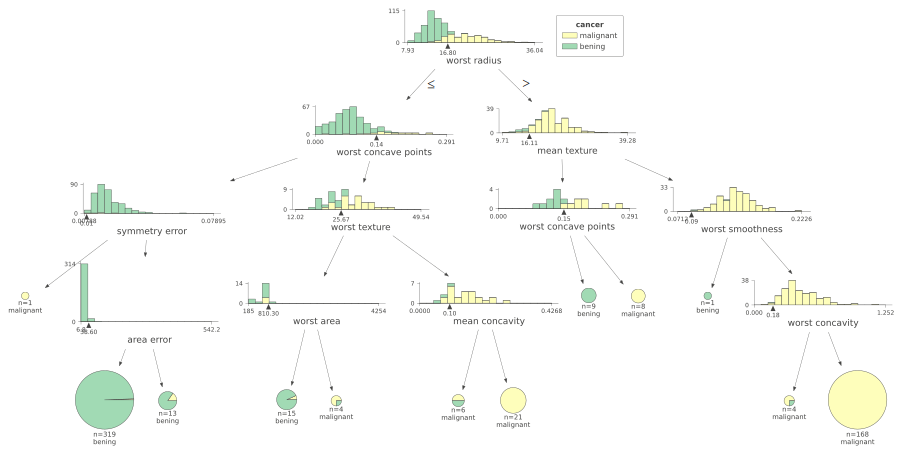

In [ ]:
# Criar árvore dtreeviz

# Mostrar árvore dtreeviz 
